<div class="alert alert-block alert-success">
<b>Comentario general del revisor</b> <a class="tocSkip"></a><br />
Status del proyecto: <b>Aprobado</b>
</div>


¡Hola!<br />
Soy **Francisco Cortés**, estoy contento de revisar tu proyecto y ser parte de tu proceso de aprendizaje.
A lo largo del texto, haré algunas observaciones sobre mejoras en el código y también haré comentarios sobre tus percepciones sobre el tema. Si existe algún error en el código, no te preocupes, estoy aquí para ayudarte a mejorarlo, en la primera iteración te lo señalaré para que tengas la oportunidad de corregirlo, pero si aún no encuentras una solución para esta tarea, te daré una pista más precisa en la próxima iteración y también algunos ejemplos prácticos. Estaré abierto a retroalimentación y discusiones sobre el tema.<br />
Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o borres**.
Revisaré cuidadosamente tu código para comprobar que se han cumplido con los requisitos y te proporcionaré mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si la ejecución fue perfecta succesfully.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si existe alguna recomendación para que tu código mejore.
</div>

<div class="alert alert-block alert-danger">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si existen correcciones necesarias para cumplir con los requisitos. El trabajo no puede ser aceptado si hay alguna caja roja.
</div>

Puedes responderme de la siguiente manera:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt

In [2]:
#leer dataset
df_games=pd.read_csv("/datasets/games.csv")

In [3]:
df_games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
#pasar columnas a minusculas
df_games.columns= df_games.columns.str.lower()
print(df_games.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


In [5]:
# verificar el tipo de datos
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
#cambiar tipo de dato y rellenar valores ausentes
df_games['year_of_release']=df_games['year_of_release'].fillna(0).astype(int)
df_games['critic_score']=df_games['critic_score'].fillna(df_games['critic_score'].mean()).astype(float)
df_games['user_score'] = df_games['user_score'].replace('tbd',np.nan)
df_games['user_score'] = pd.to_numeric(df_games['user_score'], errors='coerce')
df_games['user_score'] = df_games['user_score'].fillna(df_games['user_score'].mean()) 
df_games['user_score']=df_games['user_score'].astype(float)

In [7]:
##explicar porque se relleno los datos con 0 o con promedio

In [8]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  float64
 9   user_score       16715 non-null  float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [9]:
#sumar las ventas totales
suma_de_juegos=0
columnas_de_ventas=["na_sales","eu_sales","jp_sales","other_sales"]

for col in columnas_de_ventas:
    suma_de_juegos += df_games[col].sum()

print(f"La suma total es: {suma_de_juegos:.2f}")

La suma total es: 8915.71


In [10]:
# Verificar qué juegos de DS aparecen antes de 2004
ds_antes_2004 = df_games[(df_games['platform'] == 'DS') & (df_games['year_of_release'] < 2004)]
print(ds_antes_2004[['name', 'year_of_release', 'platform']])

                                                   name  year_of_release  \
3081                       LEGO Harry Potter: Years 5-7                0   
3289                         Advance Wars: Days of Ruin                0   
5443                                        Bejeweled 3                0   
5932                                    Shrek the Third                0   
9664                  Charm Girls Club: My Fashion Mall                0   
9855                          The Daring Game for Girls                0   
10486            Atsumare! Power Pro Kun no DS Koushien                0   
10612                          My Healthy Cooking Coach                0   
10686                                    Happy Feet Two                0   
10764                         Luminous Arc 2 (JP sales)                0   
10837                                  Egg Monster Hero                0   
11338                 Charm Girls Club: My Fashion Show                0   
11790  Mega 

In [11]:
#arreglar dato erroneo
problema = df_games[df_games['name'] == 'Strongest Tokyo University Shogi DS']
df_games.loc[df_games['name'] == 'Strongest Tokyo University Shogi DS', 'year_of_release'] = 2007

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!<br/>

Hiciste un buen trabajo al cambiar los nombres de las columnas, sus tipos de datos y reemplazar los valores ausentes
</div>


In [12]:
#ver cuantos juegos fueron lanzados por año
juegos_por_año = df_games['year_of_release'].value_counts().sort_index()
print("Juegos por año:",juegos_por_año)

Juegos por año: 0        269
1980       9
1981      46
1982      36
1983      17
1984      14
1985      13
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      62
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1198
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: year_of_release, dtype: int64


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!<br/>

Buena manera de presentar los datos, podemos ver en la tabla la tendencia de los videojuegos con un incremento constante en años anteriores que ha empezado a ir en declive en los últimos años
</div>


In [13]:
# Ver estadísticas básicas
print("Total de juegos: ",len(df_games))
print("Juegos sin año especificado (año = 0): ", (df_games['year_of_release'] == 0).sum())

Total de juegos:  16715
Juegos sin año especificado (año = 0):  269


In [14]:
#agrupar por plataforma
juegos_por_plataforma = df_games.groupby("platform")[["na_sales","eu_sales","jp_sales","other_sales"]].sum()
print(juegos_por_plataforma)

          na_sales  eu_sales  jp_sales  other_sales
platform                                           
2600         90.60      5.47      0.00         0.91
3DO           0.00      0.00      0.10         0.00
3DS          83.49     61.48    100.67        13.36
DC            5.43      1.69      8.56         0.27
DS          382.40    188.89    175.57        59.26
GB          114.32     47.82     85.12         8.20
GBA         187.54     75.25     47.33         7.73
GC          133.46     38.71     21.58         5.18
GEN          21.05      6.05      2.70         0.97
GG            0.00      0.00      0.04         0.00
N64         139.02     41.06     34.22         4.38
NES         125.94     21.15     98.65         5.31
NG            0.00      0.00      1.44         0.00
PC           94.53    142.44      0.17        22.38
PCFX          0.00      0.00      0.03         0.00
PS          336.52    213.61    139.82        40.91
PS2         583.84    339.29    139.20       193.44
PS3         

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />

Buena manera de agrupar los datos por regiones, esto es un claro indicativo de que estas pensando en hallazgos importantes
</div>


In [19]:
#ver las plataformas con mas ventas
columnas_de_ventas=["na_sales","eu_sales","jp_sales","other_sales"]
for row in columnas_de_ventas:
    juegos_por_plataforma['suma_total'] = juegos_por_plataforma[columnas_de_ventas].sum(axis=1)
top_plataformas = juegos_por_plataforma['suma_total'].sort_values(ascending=False).head(10).index.tolist()
print(top_plataformas)

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'PC']


In [20]:
#ver ventas por año del top
df_top = df_games[df_games['platform'].isin(top_plataformas)]
df_top_sin_año_0 = df_top[df_top['year_of_release'] != 0]
ventas_por_año_plataforma = df_top_sin_año_0.groupby(['year_of_release', 'platform'])[columnas_de_ventas].sum().sum(axis=1).reset_index()
ventas_por_año_plataforma.columns = ['año', 'plataforma', 'ventas_totales']
print(ventas_por_año_plataforma.head(10))

    año plataforma  ventas_totales
0  1985         PC            0.04
1  1988         PC            0.03
2  1992         PC            3.03
3  1994         PC           12.87
4  1994         PS            6.03
5  1995         PC            4.22
6  1995         PS           35.96
7  1996         PC           10.58
8  1996         PS           94.70
9  1997         PC           11.27


In [21]:
#crear tabla pivote
tabla_evolucion = ventas_por_año_plataforma.pivot(index='año', columns='plataforma', values='ventas_totales').fillna(0)
print("Evolución de ventas por año y plataforma:")
print(tabla_evolucion.head(15))

Evolución de ventas por año y plataforma:
plataforma      DS    GBA     PC      PS     PS2  PS3  PS4    PSP  Wii  X360
año                                                                         
1985          0.00   0.00   0.04    0.00    0.00  0.0  0.0   0.00  0.0  0.00
1988          0.00   0.00   0.03    0.00    0.00  0.0  0.0   0.00  0.0  0.00
1992          0.00   0.00   3.03    0.00    0.00  0.0  0.0   0.00  0.0  0.00
1994          0.00   0.00  12.87    6.03    0.00  0.0  0.0   0.00  0.0  0.00
1995          0.00   0.00   4.22   35.96    0.00  0.0  0.0   0.00  0.0  0.00
1996          0.00   0.00  10.58   94.70    0.00  0.0  0.0   0.00  0.0  0.00
1997          0.00   0.00  11.27  136.17    0.00  0.0  0.0   0.00  0.0  0.00
1998          0.00   0.00   3.26  169.49    0.00  0.0  0.0   0.00  0.0  0.00
1999          0.00   0.00   4.74  144.53    0.00  0.0  0.0   0.00  0.0  0.00
2000          0.00   0.07   4.66   96.37   39.17  0.0  0.0   0.00  0.0  0.00
2001          0.00  61.53   5.47  

In [22]:
#ver años de inicio de las consolas
ultimo_año_por_plataforma = (
    tabla_evolucion[tabla_evolucion > 0]  
    .apply(lambda col: col.last_valid_index())  
)
print(ultimo_año_por_plataforma.sort_values())

plataforma
PS      2003
GBA     2007
PS2     2011
DS      2013
PSP     2015
PC      2016
PS3     2016
PS4     2016
Wii     2016
X360    2016
dtype: int64


In [23]:
# ver años de actividad de las consolas
primer_año = tabla_evolucion[tabla_evolucion > 0].apply(lambda col: col.first_valid_index())
ultimo_año = tabla_evolucion[tabla_evolucion > 0].apply(lambda col: col.last_valid_index())

duracion_vida = ultimo_año - primer_año

resumen_plataformas = pd.DataFrame({
    'primer_año': primer_año,
    'ultimo_año': ultimo_año,
    'años_activa': duracion_vida
}).sort_values('primer_año')
print(resumen_plataformas)

            primer_año  ultimo_año  años_activa
plataforma                                     
PC                1985        2016           31
PS                1994        2003            9
GBA               2000        2007            7
PS2               2000        2011           11
DS                2004        2013            9
PSP               2004        2015           11
X360              2005        2016           11
PS3               2006        2016           10
Wii               2006        2016           10
PS4               2013        2016            3


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!<br/>

Buena manera de mostrar los datos, gracias a la tabla podemos observar el tiempo de vida de cada una de las plataformas, la PC aunque es la que lleva más tiempo sabemos que es una plataforma que ha evolucionado continuamente
</div>


los datos reelevantes para 2017 son para aquellas consolas que para el año 2016 sigan activas

In [24]:
#obtener consolas cuyos años de actividad aun esten en 2016
ventas_a_partir_2005 = ventas_por_año_plataforma[ventas_por_año_plataforma["año"]>=2005]
print(ventas_a_partir_2005.head())

     año plataforma  ventas_totales
36  2005         DS          130.14
37  2005        GBA           33.86
38  2005         PC            4.37
39  2005        PS2          160.66
40  2005        PSP           43.84


In [25]:
tabla_evolucion_2005 = ventas_a_partir_2005.pivot(index='año', columns='plataforma', values='ventas_totales').fillna(0)
print("Evolución de ventas por año y plataforma:")
print(tabla_evolucion_2005)

Evolución de ventas por año y plataforma:
plataforma      DS    GBA     PC     PS2     PS3     PS4    PSP     Wii  \
año                                                                       
2005        130.14  33.86   4.37  160.66    0.00    0.00  43.84    0.00   
2006        119.81   5.28   2.85  103.42   20.96    0.00  55.32  137.15   
2007        146.96   3.40   9.28   75.99   73.19    0.00  46.93  152.77   
2008        145.31   0.00  12.42   53.90  118.52    0.00  34.55  171.32   
2009        119.54   0.00  16.91   26.40  130.93    0.00  37.78  206.97   
2010         85.02   0.00  24.28    5.64  142.17    0.00  35.04  127.95   
2011         26.18   0.00  35.03    0.45  156.78    0.00  17.82   59.65   
2012         11.01   0.00  23.22    0.00  107.36    0.00   7.69   21.71   
2013          1.54   0.00  12.38    0.00  113.25   25.99   3.14    8.59   
2014          0.00   0.00  13.28    0.00   47.76  100.00   0.24    3.75   
2015          0.00   0.00   8.52    0.00   16.82  118.90  

In [26]:
#eliminar las consolas descontinuadas
tabla_evolucion_2005.drop(['GBA','PS2','DS','PSP'],axis=1,inplace=True)

In [27]:
tabla_evolucion_2005

plataforma,PC,PS3,PS4,Wii,X360
año,,,,,
2005,4.37,0.00,0.00,0.00,8.25
2006,2.85,20.96,0.00,137.15,51.62
2007,9.28,73.19,0.00,152.77,95.41
2008,12.42,118.52,0.00,171.32,135.26
2009,16.91,130.93,0.00,206.97,120.29
2010,24.28,142.17,0.00,127.95,170.03
2011,35.03,156.78,0.00,59.65,143.84
2012,23.22,107.36,0.00,21.71,99.74
2013,12.38,113.25,25.99,8.59,88.58


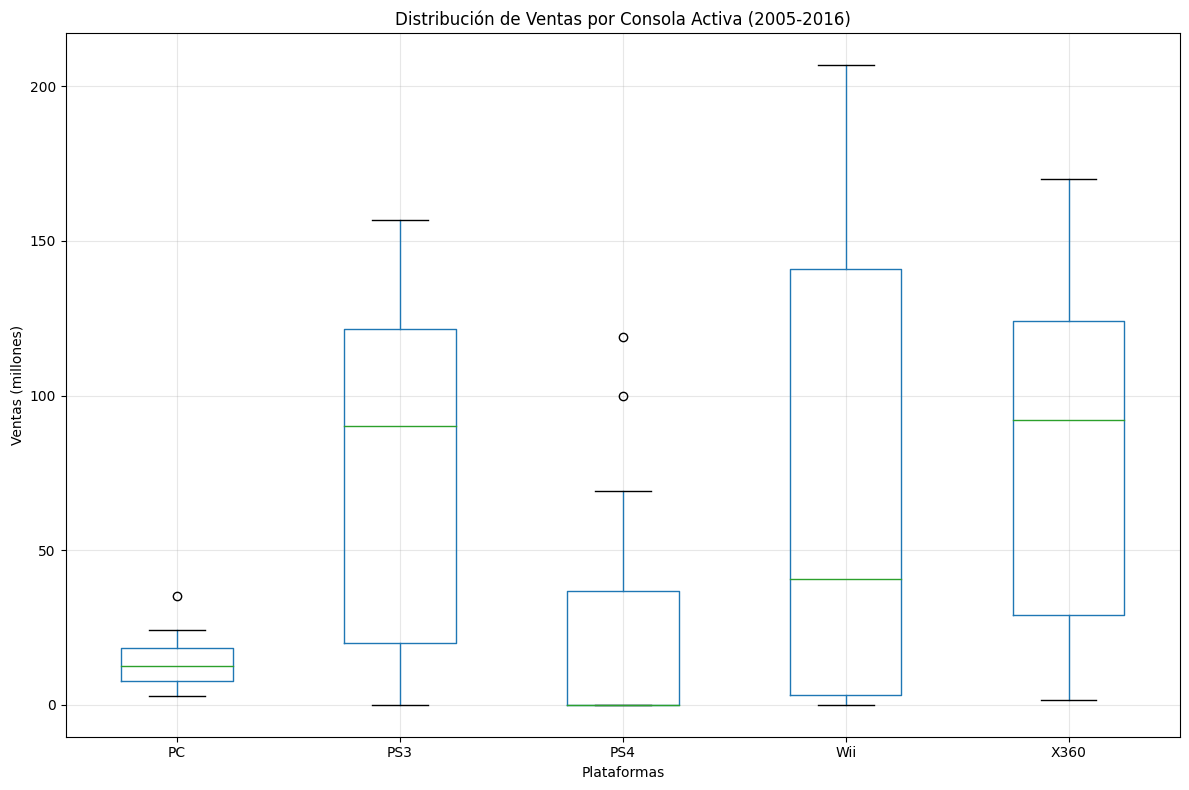

In [28]:
#crear diagrama de caja
tabla_evolucion_2005.boxplot(figsize=(12, 8))
plt.title('Distribución de Ventas por Consola Activa (2005-2016)')
plt.xlabel('Plataformas')
plt.ylabel('Ventas (millones)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!

El diagrama de caja nos muestra como en algunas plataformas las ventas estan consolidadas mientras que en otras consolas las ventas son muy disparejas lo que incrementa el rango intercuartil
</div>


In [25]:
df_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.000000,8.000000,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,68.967679,7.125046,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.000000,8.300000,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.000000,8.000000,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,68.967679,7.125046,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,68.967679,7.125046,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,68.967679,7.125046,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,68.967679,7.125046,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,68.967679,7.125046,NaN


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />

Debemos evitar hacer impresiones completas de los datos, además esto no aporta algún hallazgo importante al proyecto
</div>


In [29]:
#agregar tabal de ventas totales al dataframe
df_games['ventas_totales']=0
columnas_de_ventas=["na_sales","eu_sales","jp_sales","other_sales"]
for row in columnas_de_ventas:
    df_games['ventas_totales'] = df_games[columnas_de_ventas].sum(axis=1)
print(df_games)    

                                name platform  year_of_release         genre  \
0                         Wii Sports      Wii             2006        Sports   
1                  Super Mario Bros.      NES             1985      Platform   
2                     Mario Kart Wii      Wii             2008        Racing   
3                  Wii Sports Resort      Wii             2009        Sports   
4           Pokemon Red/Pokemon Blue       GB             1996  Role-Playing   
...                              ...      ...              ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3             2016        Action   
16711               LMA Manager 2007     X360             2006        Sports   
16712        Haitaka no Psychedelica      PSV             2016     Adventure   
16713               Spirits & Spells      GBA             2003      Platform   
16714            Winning Post 8 2016      PSV             2016    Simulation   

       na_sales  eu_sales  jp_sales  ot

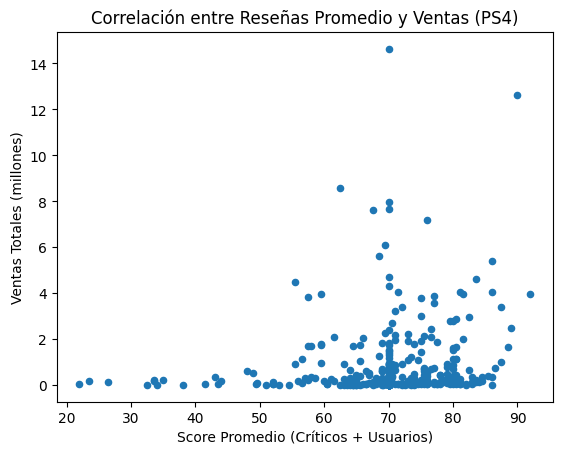

In [30]:
#evaluar la PS4
solo_ps4=df_games[df_games["platform"]=="PS4"].copy()
solo_ps4["score_mean"]=0
solo_ps4["score_mean"] = (solo_ps4["critic_score"] + 
                                         solo_ps4["user_score"]*10) / 2
solo_ps4_criticas_ventas=solo_ps4[["score_mean","ventas_totales"]]
solo_ps4_criticas_ventas.plot(kind="scatter", x="score_mean", y="ventas_totales")
plt.title('Correlación entre Reseñas Promedio y Ventas (PS4)')
plt.xlabel('Score Promedio (Críticos + Usuarios)')
plt.ylabel('Ventas Totales (millones)')
plt.show()

In [31]:
#Verificar correlacion
correlacion = solo_ps4_criticas_ventas["score_mean"].corr(solo_ps4_criticas_ventas["ventas_totales"])
print("Correlación entre reseñas y ventas: ",correlacion)

Correlación entre reseñas y ventas:  0.155547687072043


#existe una correlacion muy debil entre las ventas y la critica

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!

Buena manera de mostrar la correlación entre las ventas y las reseñas, la correlación es debil-moderada por lo que no siempre las buenas reseñas van a implicar un gran numero de ventas
</div>


In [32]:
#Agrupar juegos por genero y verificar sus ventas
ventas_por_genero=df_games.groupby("genre")["ventas_totales"].sum().sort_values(ascending=False)
print(ventas_por_genero)

genre
Action          1744.17
Sports          1331.27
Shooter         1052.45
Role-Playing     934.56
Platform         827.77
Misc             802.51
Racing           728.67
Fighting         447.53
Simulation       389.97
Puzzle           242.57
Adventure        237.59
Strategy         174.23
Name: ventas_totales, dtype: float64


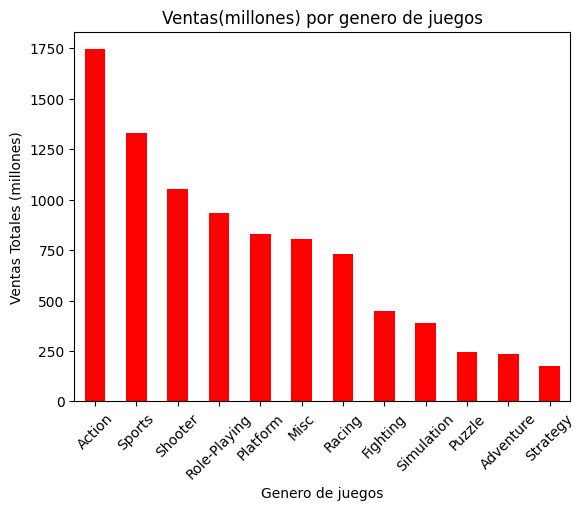

In [33]:
ventas_por_genero.plot(kind="bar",color="red")
plt.title('Ventas(millones) por genero de juegos')
plt.xlabel('Genero de juegos')
plt.xticks(rotation=45)
plt.ylabel('Ventas Totales (millones)')
plt.show()

#por una amplia diferencia el genero mas comprado es el de accion(casi alcanzando los 1750 millones) y el menos vendido es el de estrategia(no llegando a 250 millones)

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!

Buena manera de presentar los datos, podemos ver claramente cuales son los géneros preferidos de las personas, las observaciones que haces me parecen buenas también
</div>


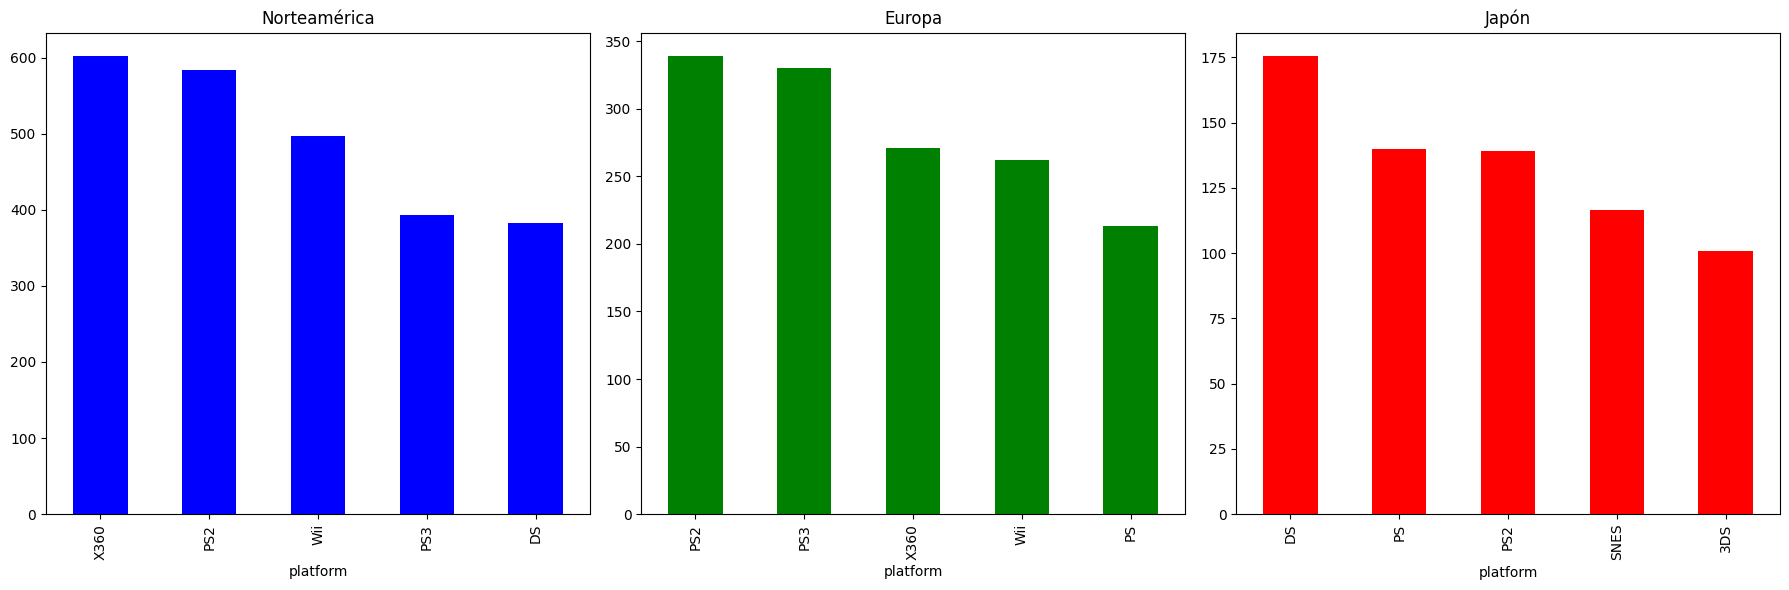

platform
X360    602.47
PS2     583.84
Wii     496.90
PS3     393.49
DS      382.40
Name: na_sales, dtype: float64 platform
PS2     339.29
PS3     330.29
X360    270.76
Wii     262.21
PS      213.61
Name: eu_sales, dtype: float64 platform
DS      175.57
PS      139.82
PS2     139.20
SNES    116.55
3DS     100.67
Name: jp_sales, dtype: float64


In [34]:
#crear perfiles de plataformas por region
norteamerica_plataforma=df_games.groupby("platform")["na_sales"].sum().sort_values(ascending=False).head()
europa_plataforma=df_games.groupby("platform")["eu_sales"].sum().sort_values(ascending=False).head()
japon_plataforma=df_games.groupby("platform")["jp_sales"].sum().sort_values(ascending=False).head()

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

norteamerica_plataforma.plot(kind='bar', ax=axes[0], color='blue', title='Norteamérica')
europa_plataforma.plot(kind='bar', ax=axes[1], color='green', title='Europa')  
japon_plataforma.plot(kind='bar', ax=axes[2], color='red', title='Japón')

plt.tight_layout()
plt.show()
print(norteamerica_plataforma,europa_plataforma,japon_plataforma)

se puede observar que la mayoria de ventas se realizan en norteamerica siendo la X360 la lider en esta region
en europa la lider de ventas es la ps2 y en japon la ds, la unica consola en comun en el top de cada region es la PS2

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!

Esta grafica nos cuenta cosas muy interesantes, Europa y Norteamerica con comportamientos algo similares mientras que Japón con una tendencia diferente en las ventas
</div>


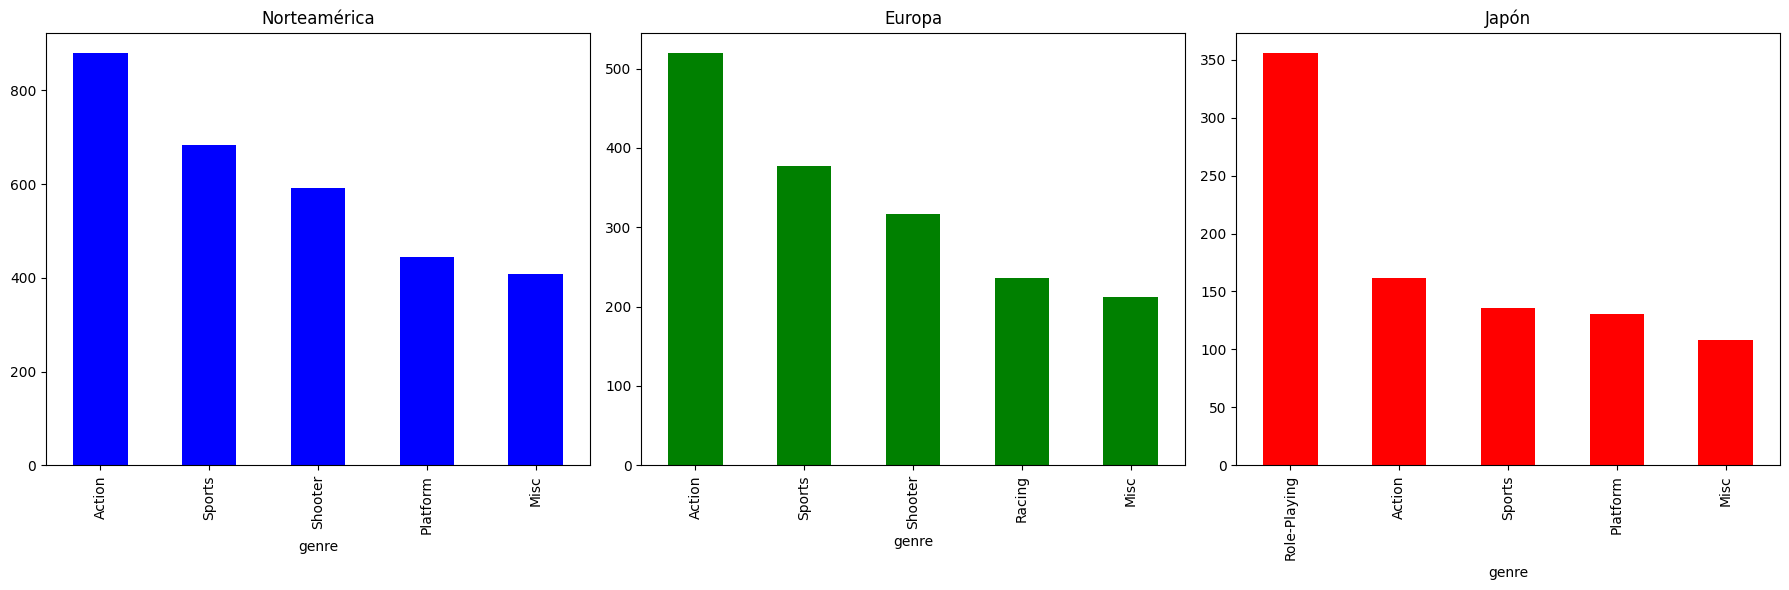

genre
Action      879.01
Sports      684.43
Shooter     592.24
Platform    445.50
Misc        407.27
Name: na_sales, dtype: float64 genre
Action     519.13
Sports     376.79
Shooter    317.34
Racing     236.51
Misc       212.74
Name: eu_sales, dtype: float64 genre
Role-Playing    355.41
Action          161.43
Sports          135.54
Platform        130.83
Misc            108.11
Name: jp_sales, dtype: float64


In [35]:
#crear perfiles por generos por region
norteamerica_genero=df_games.groupby("genre")["na_sales"].sum().sort_values(ascending=False).head()
europa_genero=df_games.groupby("genre")["eu_sales"].sum().sort_values(ascending=False).head()
japon_genero=df_games.groupby("genre")["jp_sales"].sum().sort_values(ascending=False).head()

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

norteamerica_genero.plot(kind='bar', ax=axes[0], color='blue', title='Norteamérica')
europa_genero.plot(kind='bar', ax=axes[1], color='green', title='Europa')  
japon_genero.plot(kind='bar', ax=axes[2], color='red', title='Japón')

plt.tight_layout()
plt.show()

print(norteamerica_genero,europa_genero,japon_genero)

el genero mas comprado es el de accion en norteamerica y en europa, solo en japon ocupa el segundo lugar donde el lider son los juegos de rol

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!

Una vez más el mercado japonés marcando una tendencia única
</div>


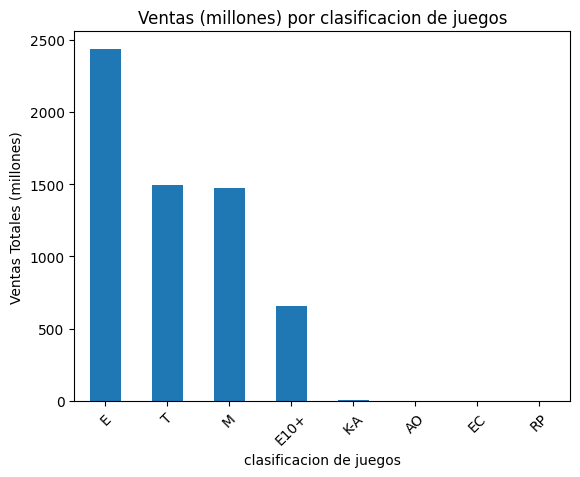

In [36]:
#ver ventas segun el sistema de clasificacion
ventas_segun_esrb=df_games.groupby("rating")["ventas_totales"].sum().sort_values(ascending=False)
ventas_segun_esrb=ventas_segun_esrb.dropna()
ventas_segun_esrb.plot(kind="bar")
plt.title('Ventas (millones) por clasificacion de juegos')
plt.xlabel('clasificacion de juegos')
plt.xticks(rotation=45)
plt.ylabel('Ventas Totales (millones)')
plt.show()

se puede observar que las mayores ventas se realizan mientras la restriccion de edad es mas baja, con la 
unica excepcion de E10+ donde la venta se situa debajo de la M

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />

Esta gráfica también debería estar agrupada por región
</div>


In [37]:
#proponer hipotesis nula
print("H0: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.")
print("H1:  Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC no son las mismas.")
print("Nivel de significancia: α = 0.05")



H0: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.
H1:  Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC no son las mismas.
Nivel de significancia: α = 0.05


In [38]:
Calificaciones_de_usuarios_xbox=df_games[df_games["platform"]=="XOne"].dropna()
Calificaciones_de_usuarios_pc=df_games[df_games["platform"]=="PC"].dropna()

In [39]:
#comprobar hipotesis
alpha = 0.05
results = st.ttest_ind(Calificaciones_de_usuarios_xbox['user_score'],Calificaciones_de_usuarios_pc['user_score'], equal_var=False)

print(f'Valor p: {results.pvalue}')

if (alpha>results.pvalue):
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

Valor p: 9.454393577034949e-07
Rechazamos la hipótesis nula


se establecio un alpha en 0.05 y se verifico que los datasets fueran equivalentes y al tener un resultado bajo se rechaza la hipotesis

In [40]:
#proponer hipotesis nula
print("H0: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.")
print("H1: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.")
print("Nivel de significancia: α = 0.05")

H0: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.
H1: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.
Nivel de significancia: α = 0.05


In [41]:
Calificaciones_promedio_accion=df_games[df_games["genre"]=="Action"].dropna()
Calificaciones_promedio_deportes=df_games[df_games["genre"]=="Sports"].dropna()

In [42]:
#comprobar hipotesis
alpha = 0.05
results = st.ttest_ind(Calificaciones_promedio_accion['user_score'],Calificaciones_promedio_deportes['user_score'], equal_var=False)

print(f'Valor p: {results.pvalue}')

if (alpha>results.pvalue):
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")


Valor p: 0.26818462306828844
No podemos rechazar la hipótesis nula


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />


El planteamiento de la hipótesis me parece correcto en ambos casos, bien hecho!
</div>


se establecio un alpha en 0.05 y se verifico que los datasets fueran equivalentes y al tener un resultado bajo se rechaza la hipotesis

fue un trabajo largo pero gratificante el poder realizarlo 
y espero que este correcto y cumpla con lo pedido

## Comentario general del revisor
<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Has realizado un buen trabajo, me doy cuenta de que has aplicado los conocimientos que has adquirido durante el curso, las observaciones que has hecho durante todo el ejercicio me han parecido bastante buenas, son un gran apoyo a la hora de revisar el proyecto ya que me dan a entender que el tema te ha quedado claro y has podido avanzar correctamente.

    
Continúa con el buen trabajo y mucho éxito en el siguiente Sprint!
</div>


<div class="alert alert-block alert-success">
<b>Aspectos positivos del proyecto</b> <a class="tocSkip"></a><br />

- Las observaciones intermedias, así como las conclusiones finales me parecen buenas
- El proyecto esta ordenado
    
</div>

<div class="alert alert-block alert-warning">
<b>Aspectos que pueden mejorar del proyecto</b> <a class="tocSkip"></a><br />

- Se pueden incluir más graficas para resaltar las observaciones o datos que muestras
- Desarrollar un poco más las conclusiones finales, puedes añadir lo que te pareció complicado del proyecto, que mejoras se pueden hacer, etc.
</div>
